# Connect to G-Drive

In [164]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [165]:
import os
csv_file_dir = "/content/drive/MyDrive/BNSP"
os.chdir(csv_file_dir)

In [166]:
!ls

 data   KNN_model.pkl  '[Sandbox] Heart Disease Prediction.ipynb'


# Import Library

In [167]:
# EDA & FE
## Data Manipulation
import pandas as pd
import numpy as np

## Data Visualization
import seaborn as sns
sns.set_style("whitegrid")

import matplotlib.pyplot as plt

## Data Preprocessing
from sklearn.preprocessing import (
    LabelEncoder, OrdinalEncoder, StandardScaler, RobustScaler
)

from sklearn.impute import (
    SimpleImputer, KNNImputer
)

from sklearn.model_selection import (
    train_test_split, GridSearchCV,
    KFold, cross_val_score
)

# Modelling
## Machine Learning Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier

)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

## Machine Learning Evaluation
from sklearn.metrics import (
    classification_report, accuracy_score,
    confusion_matrix, ConfusionMatrixDisplay
)

# Save Model to Pickle
import joblib

# Import Dataset

In [168]:
df= pd.read_csv("data/healthcare-dataset-heart_disease.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


## Domain Knowledge

Penyakit jantung merujuk pada sekelompok kondisi yang mempengaruhi fungsi normal jantung. Kondisi ini dapat mempengaruhi kemampuan jantung untuk memompa darah dengan efektif, menyebabkan gangguan sirkulasi darah, dan berpotensi menjadi ancaman serius bagi kesehatan seseorang.

1. Gender (Gender): Diketahui bahwa **gender female** memiliki jumlah presentase penderita penyakit jantung lebih banyak dibandingkan pria.

2. Usia (Age): **Usia Lanjut** memiliki potensi yang lebih tinggi untuk terkena penyakit jantung.

3. Tekanan Darah Tinggi (Hipertension): **Tekanan darah tinggi** yang tidak terkontrol dapat memengaruhi kesehatan jantung dan menyebabkan komplikasi seperti gagal jantung.

4. Status Menikah (ever married): Seseorang yang **melakukan pernikahan / sedang dalam pernikahan**, memiliki presentase terkena serangan penyakit lebih kecil dibandingkan seseorang yang tidak menikah.

5. Status Perkerjaan (Work Type): seseorang yang **tidak bekerja**, memiliki presentase terkena penyakit jantung lebih tinggi dibandingkan seseorang yang bekerja.

6. Status Tempat Tinggal (Residence Type): seseorang yang **tinggal di wilayah kota / urban**, memiliki presentase terkena serangan penyakit jantung lebih tinggi dibandingkan seseorang yang tinggal di desa.

7. Diabetes (Avg Glucose Level): **Diabetes** yang tidak terkontrol dapat merusak pembuluh darah dan menyebabkan kerusakan pada jantung.

8. Body Mass Index (bmi): **BMI** yang tinggi memiliki potensi yang tinggi terhadap seseorang dalam terkena penyakit jantung.
- Below 18.5 -> Underweight
- 18.5 - 24.9 -> Normal or Healthy Weight
- 25.0 - 29.9 -> Overweight
- 30.0 Above -> Obese

  https://www.cdc.gov/healthyweight/assessing/index.html
  
9. Merokok (Smoking Status): **Merokok dan paparan asap rokok pasif** dapat meningkatkan risiko penyakit jantung koroner.


source 1 : (https://ayosehat.kemkes.go.id/topik-penyakit/penyakit-kardiovaskular/penyakit-jantung)

source 2 : (https://jurnal.um-palembang.ac.id/syifamedika/article/viewFile/1420/1170)

source 3 : (https://www.sciencedirect.com/science/article/pii/S2213398421002451)

## Dataset Description

Data Set Story:
- dataset ini memiliki 5110 baris and 11 kolom.
- variabel independent berisikan data terkait pasien.
- variabel dependen merujuk pada heart disease

Kumpulan data ini digunakan untuk meramalkan apakah pasien kemungkinan besar akan mengalami penyakit jantung berdasarkan parameter input seperti jenis kelamin, usia, hipertensi, pernah menikah, jenis pekerjaan, jenis tempat tinggal, kadar glukosa rata-rata, BMI, dan status merokok.

Features:

1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0=if the patient doesn't have hypertension, 1=if the patient has hypertension
5. ever_married: "No" or "Yes"
6. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
7. Residence_type: "Rural" or "Urban"
8. avg_glucose_level: average glucose level in blood
9. bmi: body mass index
10. smoking_status: "formerly smoked",
"never smoked", "smokes" or "Unknown"*
11. heart_disease: 0= if the patient doesn't have any heart diseases, 1= if the patient has a heart disease

# Explaratory Data Analysis (EDA)

## Dataset Columns Information

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


## Dependent Column Proportion

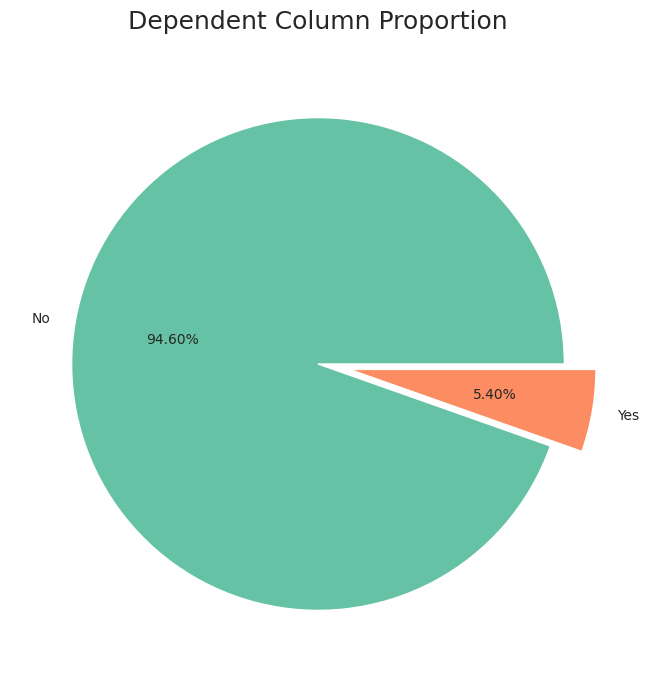

In [170]:
fig, ax = plt.subplots(figsize=(10,8))

plt.title(
    "Dependent Column Proportion",
    fontdict=({'fontsize':18}),
    pad= 20
)

mylabels= ['No', 'Yes']

ax= (
    plt.pie(
        df['heart_disease'].value_counts(),
        labels= mylabels,
        autopct="%0.2f%%",
        colors= sns.color_palette('Set2'),
        explode=(0, 0.13),
    )
)

## Check Missing Values

In [171]:
df.isnull().sum()[df.isnull().sum() > 0]

bmi    201
dtype: int64

In [172]:
# Peeking Missing Values in dataset for BMI Columns
df[df['bmi'].isna()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes


In [173]:
print(f"Percentage Missing Values: {round((((df['bmi'].isna().sum())/len(df))*100), 2)}%")

Percentage Missing Values: 3.93%


In [239]:
jumlah = df[(df['bmi'].isna()) & (df['heart_disease'] == 1)]['heart_disease'].count()
print(f"Jumlah Missing Values yang memiliki Pengaruh terhadap dependent data 1 : {jumlah}")

Jumlah Missing Values yang memiliki Pengaruh terhadap dependent data 1 : 33


## Numerical Columns Analysis

### Numerical Columns Distribution

In [174]:
dfnumerics= df.select_dtypes(exclude='object')
dfnumerics.drop(['id', 'hypertension', 'heart_disease'],axis=1, inplace=True)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>, <Axes: >]], dtype=object)

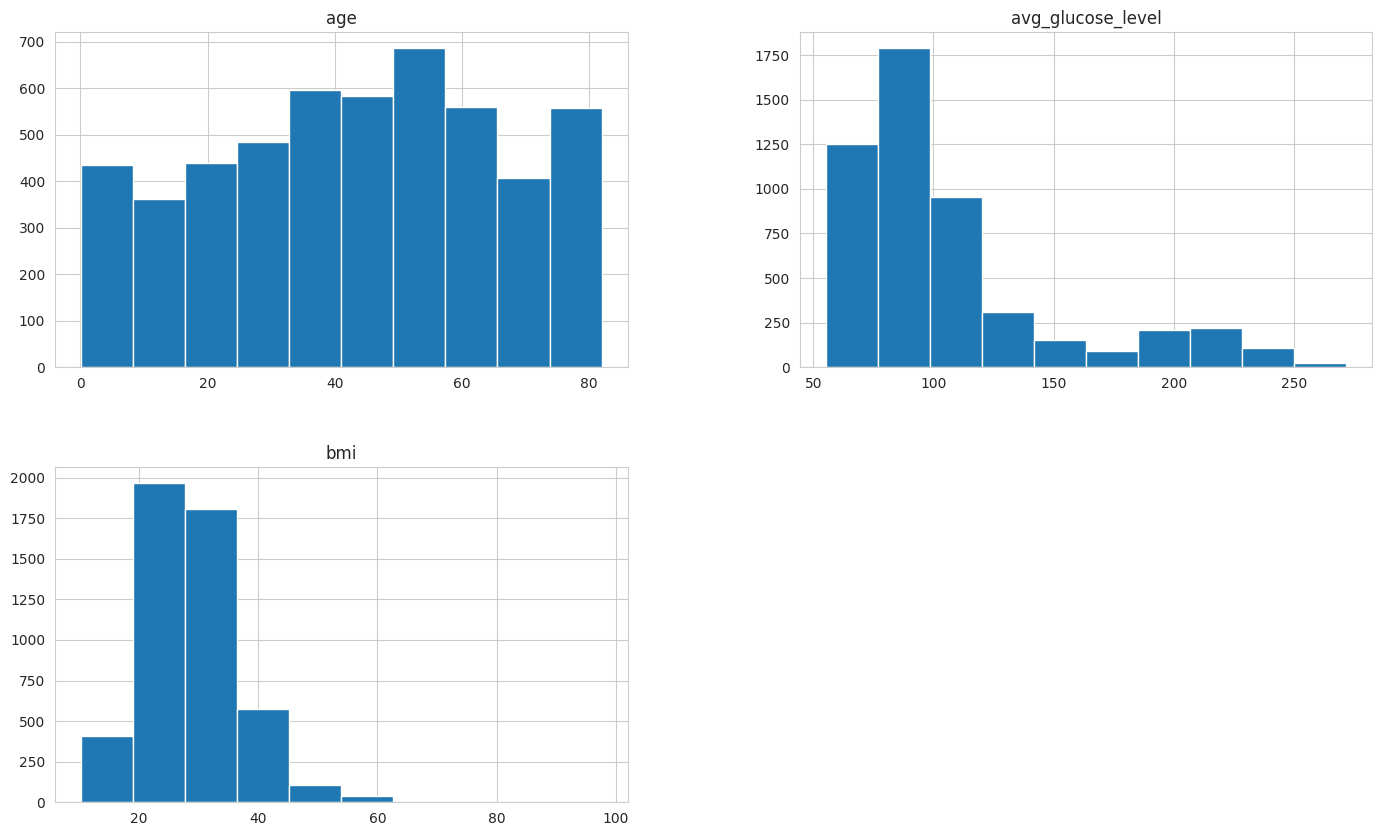

In [175]:
dfnumerics.hist(figsize=(17,10))

### Relationship between Dependent and Independent Columns (Numerical)

<Axes: xlabel='bmi', ylabel='Density'>

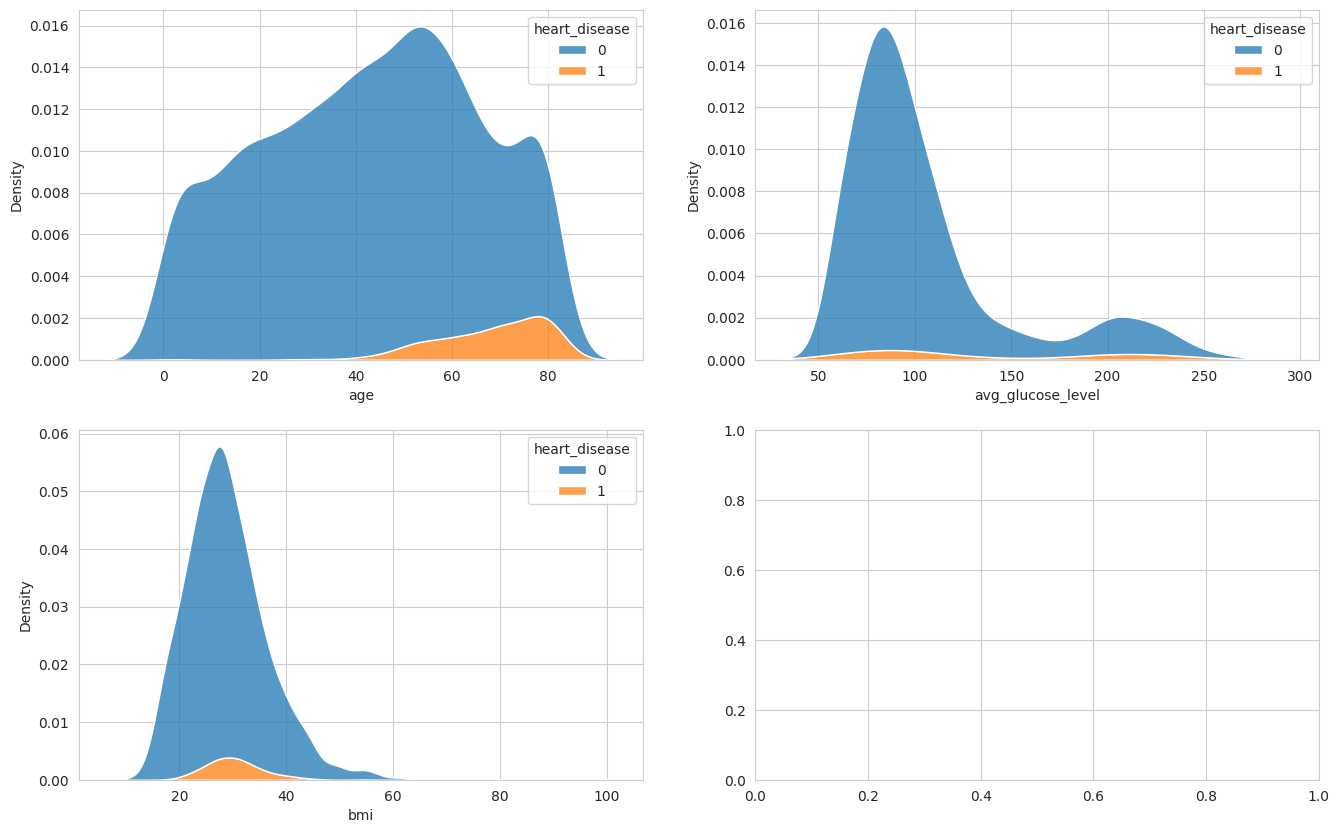

In [176]:
fig, ax= plt.subplots(figsize=(16,10), ncols=2, nrows=2)

sns.kdeplot(ax= ax[0,0], x= df['age'], hue= df['heart_disease'], multiple="stack")
sns.kdeplot(ax= ax[0,1], x= df['avg_glucose_level'], hue= df['heart_disease'], multiple="stack")
sns.kdeplot(ax= ax[1,0], x= df['bmi'], hue= df['heart_disease'], multiple="stack")

### Checking Outlier

<Axes: >

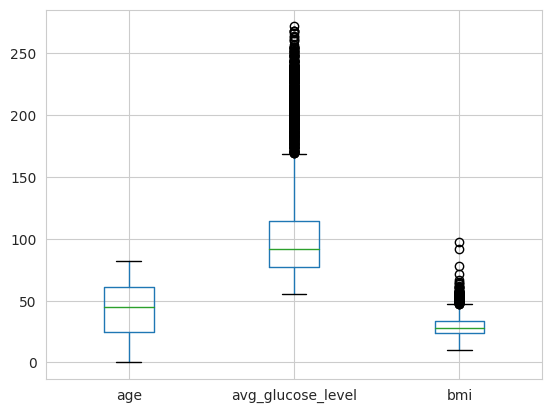

In [177]:
dfnumerics.boxplot()

In [178]:
print("bmi Outlier Observe")
# IQR
Q1 = dfnumerics['bmi'].quantile(0.25)
Q3 = dfnumerics['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Above Upper bound
upper = Q3+1.5*IQR
upper_array = np.array(dfnumerics['bmi'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())

# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(dfnumerics['bmi'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

bmi Outlier Observe
Upper Bound: 47.5
113
Lower Bound: 9.099999999999998
0


In [179]:
print("avg_glucose_level Outlier Observe")
# IQR
Q1 = dfnumerics['avg_glucose_level'].quantile(0.25)
Q3 = dfnumerics['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1

# Above Upper bound
upper = Q3+1.5*IQR
upper_array = np.array(dfnumerics['avg_glucose_level'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())

# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(dfnumerics['avg_glucose_level'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

avg_glucose_level Outlier Observe
Upper Bound: 169.35750000000002
627
Lower Bound: 21.977500000000006
0


## Categorical Columns Analysis

### Categorical Columns Proportion

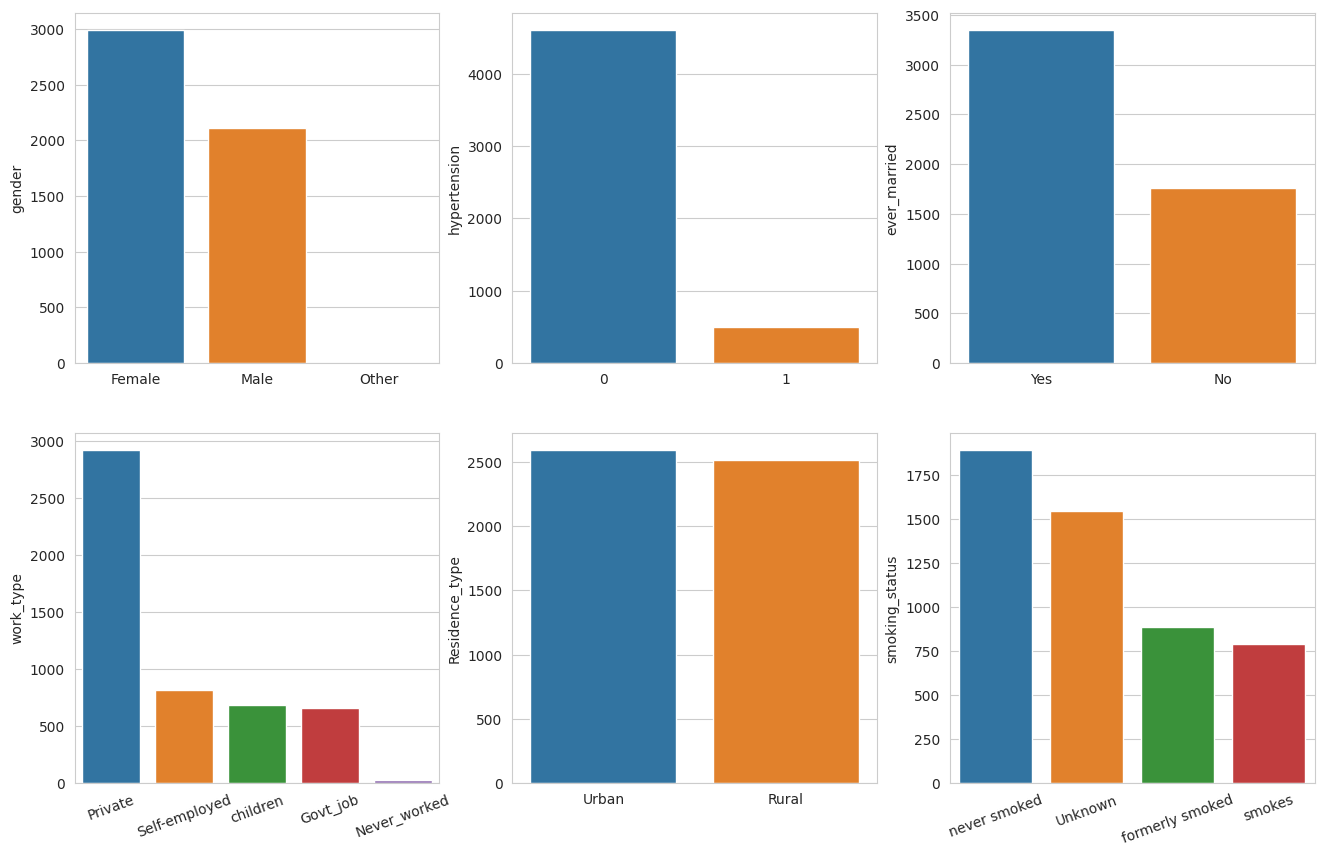

In [180]:
fig, ax= plt.subplots(figsize=(16,10), ncols=3, nrows=2)

sns.barplot(ax= ax[0,0], x= df['gender'].value_counts().index, y= df['gender'].value_counts())
sns.barplot(ax= ax[0,1], x= df['hypertension'].value_counts().index, y= df['hypertension'].value_counts())
sns.barplot(ax= ax[0,2], x= df['ever_married'].value_counts().index, y= df['ever_married'].value_counts())
sns.barplot(ax= ax[1,0], x= df['work_type'].value_counts().index, y= df['work_type'].value_counts())
ax[1,0].tick_params('x', labelrotation=20)
sns.barplot(ax= ax[1,1], x= df['Residence_type'].value_counts().index, y= df['Residence_type'].value_counts())
sns.barplot(ax= ax[1,2], x= df['smoking_status'].value_counts().index, y= df['smoking_status'].value_counts())
ax[1,2].tick_params('x', labelrotation=20)

### Relationship between Dependent and Independent Columns (Categorical)

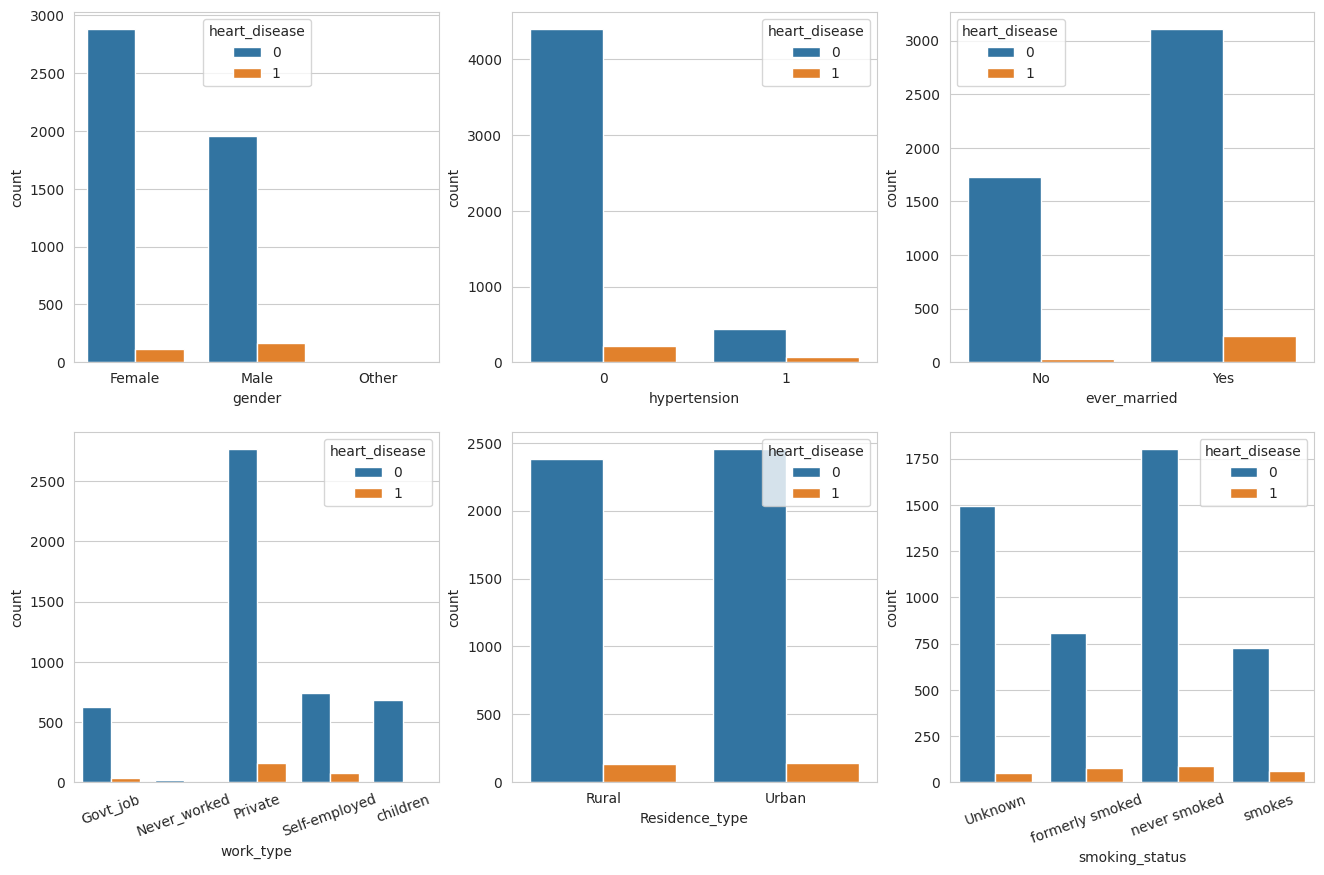

In [181]:
fig, ax= plt.subplots(figsize=(16,10), ncols=3, nrows=2)

gender = df.groupby(['gender', 'heart_disease'], as_index=False).agg(count=("heart_disease", 'count'))
hypertension = df.groupby(['hypertension', 'heart_disease'], as_index=False).agg(count=("heart_disease", 'count'))
ever_married = df.groupby(['ever_married', 'heart_disease'], as_index=False).agg(count=("heart_disease", 'count'))
work_type = df.groupby(['work_type', 'heart_disease'], as_index=False).agg(count=("heart_disease", 'count'))
Residence_type = df.groupby(['Residence_type', 'heart_disease'], as_index=False).agg(count=("heart_disease", 'count'))
smoking_status = df.groupby(['smoking_status', 'heart_disease'], as_index=False).agg(count=("heart_disease", 'count'))

sns.barplot(ax= ax[0,0], x= gender['gender'], y= gender['count'], hue=gender['heart_disease'])
sns.barplot(ax= ax[0,1], x= hypertension['hypertension'], y= hypertension['count'], hue=hypertension['heart_disease'])
sns.barplot(ax= ax[0,2], x= ever_married['ever_married'], y= ever_married['count'], hue=ever_married['heart_disease'])
sns.barplot(ax= ax[1,0], x= work_type['work_type'], y= work_type['count'], hue=work_type['heart_disease'])
ax[1,0].tick_params('x', labelrotation=20)
sns.barplot(ax= ax[1,1], x= Residence_type['Residence_type'], y= Residence_type['count'], hue=Residence_type['heart_disease'])
sns.barplot(ax= ax[1,2], x= smoking_status['smoking_status'], y= smoking_status['count'], hue=smoking_status['heart_disease'])
ax[1,2].tick_params('x', labelrotation=20)

Gender

In [182]:
checkGender= df.groupby(by=['gender', 'heart_disease'], as_index=False).agg(valcount= ('heart_disease', 'count'))

Female = checkGender[checkGender['gender'] == 'Female']
print(f"presentase Female tidak heart disease : {round(Female.valcount[0]/sum(Female['valcount']), 3)}")
print(f"presentase Female heart disease : {round(Female.valcount[1]/sum(Female['valcount']), 3)}\n")

Male = checkGender[checkGender['gender'] == 'Male']
print(f"presentase Male tidak heart disease : {round(Male.valcount[2]/sum(Male['valcount']), 3)}")
print(f"presentase Male heart disease : {round(Male.valcount[3]/sum(Male['valcount']), 3)}")

presentase Female tidak heart disease : 0.962
presentase Female heart disease : 0.038

presentase Male tidak heart disease : 0.923
presentase Male heart disease : 0.077


Hypertension

In [183]:
checkHypertension= df.groupby(by=['hypertension', 'heart_disease'], as_index=False).agg(valcount= ('heart_disease', 'count'))

Not_hipertension = checkHypertension[checkHypertension['hypertension'] == 0]
print(f"Tidak mengalami hipertensi presentase data tidak heart disease : {round(4400/sum(Not_hipertension['valcount']), 3)}")
print(f"Tidak Mengalami hipertensi presentase data heart disease : {round(212/sum(Not_hipertension['valcount']), 3)}\n")

Hipertension = checkHypertension[checkHypertension['hypertension'] == 1]
print(f"Mengalami hipertensi presentase data tidak heart disease : {round(434/sum(Hipertension['valcount']), 3)}")
print(f"Mengalami hipertensi presentase data heart disease : {round(64/sum(Hipertension['valcount']), 3)}")

Tidak mengalami hipertensi presentase data tidak heart disease : 0.954
Tidak Mengalami hipertensi presentase data heart disease : 0.046

Mengalami hipertensi presentase data tidak heart disease : 0.871
Mengalami hipertensi presentase data heart disease : 0.129


Ever Married

In [184]:
checkEverMarried= df.groupby(by=['ever_married', 'heart_disease'], as_index=False).agg(valcount= ('heart_disease', 'count'))

Not_Married= checkEverMarried[checkEverMarried['ever_married'] == 'No']
print(f"Tidak Menikah presentase data tidak heart disease : {round(Not_Married.valcount[0]/sum(Not_Married['valcount']), 3)}")
print(f"Tidak Menikah presentase data heart disease : {round(Not_Married.valcount[1]/sum(Not_Married['valcount']), 3)}\n")

Married = checkEverMarried[checkEverMarried['ever_married'] == 'Yes']
print(f"Menikah presentase data tidak heart disease : {round(Married.valcount[2]/sum(Married['valcount']), 3)}")
print(f"Menikah presentase data heart disease : {round(Married.valcount[3]/sum(Married['valcount']), 3)}")

Tidak Menikah presentase data tidak heart disease : 0.982
Tidak Menikah presentase data heart disease : 0.018

Menikah presentase data tidak heart disease : 0.927
Menikah presentase data heart disease : 0.073


Work Type

In [185]:
chekWorkType= df.groupby(by=['work_type', 'heart_disease'], as_index=False).agg(valcount= ('heart_disease', 'count'))

govJob= chekWorkType[chekWorkType['work_type'] == 'Govt_job']
print(f"Pekerjaan Govt job presentase data tidak heart disease : {round(govJob.valcount[0]/sum(govJob['valcount']), 3)}")
print(f"Pekerjaan Govt job presentase data heart disease : {round(govJob.valcount[1]/sum(govJob['valcount']), 3)}\n")

NeverWorked= chekWorkType[chekWorkType['work_type'] == 'Never_worked']
print(f"Pekerjaan Never worked presentase data tidak heart disease : {round(NeverWorked.valcount[2]/sum(NeverWorked['valcount']), 3)}\n")

Private= chekWorkType[chekWorkType['work_type'] == 'Private']
print(f"Pekerjaan Private presentase data tidak heart disease : {round(Private.valcount[3]/sum(Private['valcount']), 3)}")
print(f"Pekerjaan Private presentase data heart disease : {round(Private.valcount[4]/sum(Private['valcount']), 3)}\n")

SelfEmployed = chekWorkType[chekWorkType['work_type'] == 'Self-employed']
print(f"Pekerjaan Self-employed data tidak heart disease : {round(SelfEmployed.valcount[5]/sum(SelfEmployed['valcount']), 3)}")
print(f"Pekerjaan Self-employed data heart disease : {round(SelfEmployed.valcount[6]/sum(SelfEmployed['valcount']), 3)}\n")

Children = chekWorkType[chekWorkType['work_type'] == 'children']
print(f"Pekerjaan children data tidak heart disease : {round(Children.valcount[7]/sum(Children['valcount']), 3)}")
print(f"Pekerjaan children data heart disease : {round(Children.valcount[8]/sum(Children['valcount']), 3)}")

Pekerjaan Govt job presentase data tidak heart disease : 0.945
Pekerjaan Govt job presentase data heart disease : 0.055

Pekerjaan Never worked presentase data tidak heart disease : 1.0

Pekerjaan Private presentase data tidak heart disease : 0.946
Pekerjaan Private presentase data heart disease : 0.054

Pekerjaan Self-employed data tidak heart disease : 0.901
Pekerjaan Self-employed data heart disease : 0.099

Pekerjaan children data tidak heart disease : 0.999
Pekerjaan children data heart disease : 0.001


Residence Type

In [186]:
checkResidence= df.groupby(by=['Residence_type', 'heart_disease'], as_index=False).agg(valcount= ('heart_disease', 'count'))

Rular= checkResidence[checkResidence['Residence_type'] == 'Rural']
print(f"Rular presentase data tidak heart disease : {round(Rular.valcount[0]/sum(Rular['valcount']), 3)}")
print(f"Rular presentase data heart disease : {round(Rular.valcount[1]/sum(Rular['valcount']), 3)}\n")

Urban= checkResidence[checkResidence['Residence_type'] == 'Urban']
print(f"Urban presentase data tidak heart disease : {round(Urban.valcount[2]/sum(Urban['valcount']), 3)}")
print(f"Urban presentase data heart disease : {round(Urban.valcount[3]/sum(Urban['valcount']), 3)}")

Rular presentase data tidak heart disease : 0.947
Rular presentase data heart disease : 0.053

Urban presentase data tidak heart disease : 0.945
Urban presentase data heart disease : 0.055


Smoking Status

In [187]:
checkSmokingStatus= df.groupby(by=['smoking_status', 'heart_disease'], as_index=False).agg(valcount= ('heart_disease', 'count'))

Unknown= checkSmokingStatus[checkSmokingStatus['smoking_status'] == 'Unknown']
print(f"Status Unknown presentase data tidak heart disease : {round(Unknown.valcount[0]/sum(Unknown['valcount']), 3)}")
print(f"Status Unknown presentase data heart disease : {round(Unknown.valcount[1]/sum(Unknown['valcount']), 3)}\n")

formerlySmoked	= checkSmokingStatus[checkSmokingStatus['smoking_status'] == 'formerly smoked']
print(f"Status Formerly Smoked presentase data tidak heart disease : {round(formerlySmoked.valcount[2]/sum(formerlySmoked['valcount']), 3)}")
print(f"Status Formerly Smoked presentase data heart disease : {round(formerlySmoked.valcount[3]/sum(formerlySmoked['valcount']), 3)}\n")

neverSmoked= checkSmokingStatus[checkSmokingStatus['smoking_status'] == 'never smoked']
print(f"Status Never Smoked presentase data tidak heart disease : {round(neverSmoked.valcount[4]/sum(neverSmoked['valcount']), 3)}")
print(f"Status Never Smoked presentase data heart disease : {round(neverSmoked.valcount[5]/sum(neverSmoked['valcount']), 3)}\n")

smokes	= checkSmokingStatus[checkSmokingStatus['smoking_status'] == 'smokes']
print(f"Status Smokes presentase data tidak heart disease : {round(smokes.valcount[6]/sum(smokes['valcount']), 3)}")
print(f"Status Smokes presentase data heart disease : {round(smokes.valcount[7]/sum(smokes['valcount']), 3)}")

Status Unknown presentase data tidak heart disease : 0.969
Status Unknown presentase data heart disease : 0.031

Status Formerly Smoked presentase data tidak heart disease : 0.913
Status Formerly Smoked presentase data heart disease : 0.087

Status Never Smoked presentase data tidak heart disease : 0.952
Status Never Smoked presentase data heart disease : 0.048

Status Smokes presentase data tidak heart disease : 0.923
Status Smokes presentase data heart disease : 0.077


## Digging deeper into the data

### Work type Columns, Difference between Children and Never Worked

In [188]:
dfmask = df[(df['work_type'] == 'children') | (df['work_type'] == 'Never_worked')]

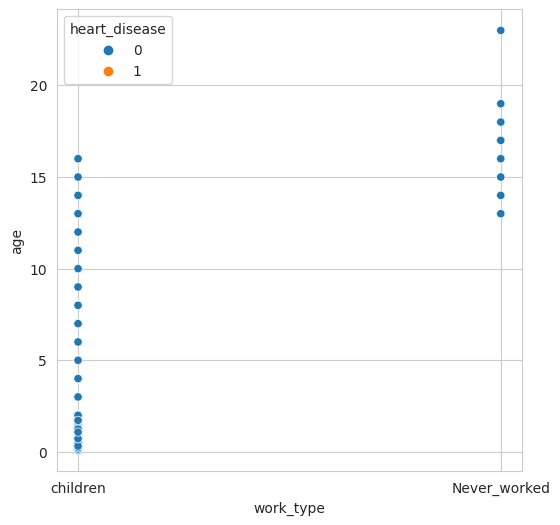

In [189]:
fig, ax = plt.subplots(figsize=(6,6))

ax= (
  sns.scatterplot(
      x= dfmask['work_type'],
      y= dfmask['age'],
      hue = dfmask['heart_disease']
  )
)


In [190]:
dfmask['heart_disease'].value_counts()

0    708
1      1
Name: heart_disease, dtype: int64

### Are there people under the age of 18 who smoke?

In [191]:
dfmask = df[(df['age'] < 18) & (df['smoking_status'] != 'never smoked') & (df['smoking_status'] != 'Unknown')]

In [192]:
print(f"Jumlah Seseorang diusia 18 tahun kebawah yang berstatus formerly smokes berjumlah: {dfmask[dfmask['smoking_status'] == 'formerly smoked']['smoking_status'].count()}")
print(f"Jumlah Seseorang diusia 18 tahun kebawah yang berstatus smokes berjumlah: {dfmask[dfmask['smoking_status'] == 'smokes']['smoking_status'].count()}")

Jumlah Seseorang diusia 18 tahun kebawah yang berstatus formerly smokes berjumlah: 25
Jumlah Seseorang diusia 18 tahun kebawah yang berstatus smokes berjumlah: 9


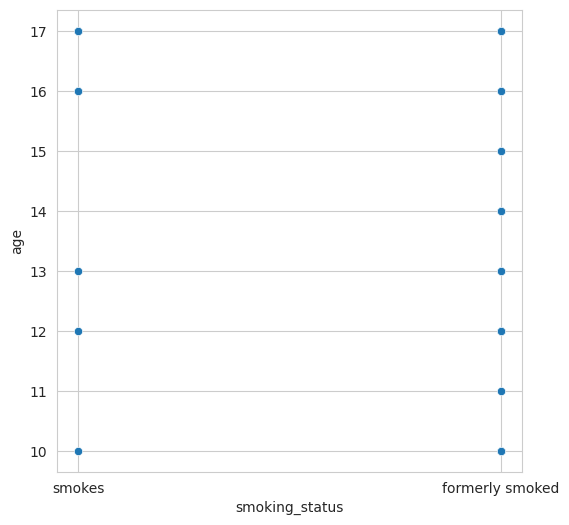

In [193]:
fig, ax = plt.subplots(figsize=(6,6))
ax= (
  sns.scatterplot(
      x= dfmask['smoking_status'],
      y= dfmask['age']
  )
)

### Analysis the impact of missing values to dependent data

In [194]:
dfmask= df[df['bmi'].isna()]

In [195]:
countMask= dfmask[dfmask['heart_disease'] == 1]['heart_disease'].count()
print(f"Jumlah Missing values terhadap dependent data heart disease = 1, berjumlah : {countMask}")

Jumlah Missing values terhadap dependent data heart disease = 1, berjumlah : 33


In [196]:
percentage= round((dfmask[dfmask['heart_disease'] == 1]['heart_disease'].count()/len(df[df['heart_disease'] == 1]))*100, 2)
print(f"percentage data yang hilang jika dilakukan drop pada dependent variabel kelas 1 = {percentage}%")

percentage data yang hilang jika dilakukan drop pada dependent variabel kelas 1 = 11.96%


### Analysis Relationship BMI and Age Column

<Axes: xlabel='age', ylabel='bmi'>

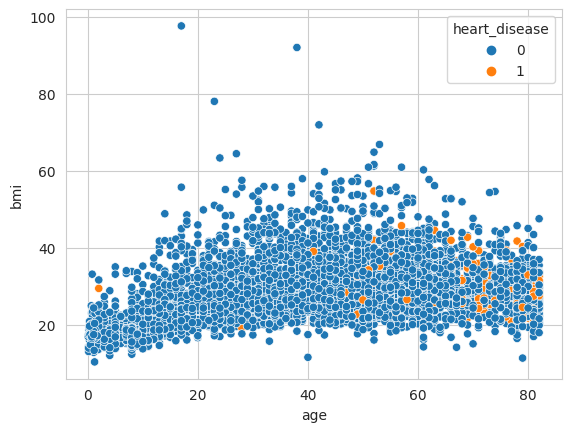

In [197]:
sns.scatterplot(
    x= df['age'],
    y= df['bmi'],
    hue= df['heart_disease']
)

## EDA Insight

### Dependent Data Distribution
- Dependent data distribution is **Not good**, proportion is 94.6% : 5.4%

### Missing Values:
1. There's 201 Null Values in BMI Columns
2. Jumlah missing values kurang dari 4% dari keseluruhan dataset.

### Numerical Columns Analysis

1. Columns Age : Minimal Age = 0.08.
2. Columns Age : dari hasil data, tidak ada yang terkena penyakit jantung pada usia kurang dari satu tahun.
3. avg_glucose_level & bmi column, memiliki jenis distribusi data positif skew / menceng kanan.

  (Catatan Imputasi Missing Values = Median Imputation)
4. avg_glucose_level column : dari scatter plot diketahui bahwa orang yang tidak rentan terkena heart_disease berada pada glucose level wilayah 150.
5. bmi column : seseorang yang rentan terkena heart_diseases berada pada rentan bmi 20-50.

### Categorical Columns Analysis
1. gender Column : "Other" hanya memiliki 1 value saja.

  (Catatan Handling Data : lakukan drop data Other)
2. gender column : Male memiliki proporsi terkena penyakit jantung lebih besar dibandingkan female.
3. Hypertension Column : proporsi data hipertensi dan tidak hipertensi tidak seimbang. perbandingan proporsi tidak hipertensi = 90.2%, hipertensi 9.8%
4. Hypertension Column : Orang yang tidak mengalami hipertensi, memiliki presentase lebih besar untuk tidak terkena heart_disease.
4. Work_type Column : never work hanya memiliki sedikit data.

  (Catatan Handling Data : menghapus Data never worked / atau digabungkan dengan children)

5. Smoking Status Column : Mengapa terdapat Unknown status pada smoking status yang memiliki jumlah proporsi data yang sangat tinggi?
6. Smoking Status Column : Status Unknown berkemungkinan ditempati oleh orang-orang yang tidak merokok, hal ini dapat dilihat bahwa presentase heart_diseases di status Unknown berdasarkan data, rendah.

### Outlier Data
1. **BMI** Column has outliers, number of outliers is 113 data
2. **avg_glucose_level** Column has outlier, number of outliers is 627 data

### Digging deeper into the data
1. Work type Column : Diketahui bahwa work type children dan never worked dibedakan berdasarkan rentan usia, dimana children usia 0.8 - kurang lebih 17 tahun, sedangkan never worked berada pada range usia 13 tahun keatas. dilihat jumlah seseorang yang terkena heart diseases hanya 1 orang.

  (Catatan : children dan never worked dapat dijadikan satu kategori saja)

2. Terdapat beberapa orang yang sudah merokok diusia dibawah 18 tahun yang merokok, jumlah formerly smokes berjumlah 25 dan smokes 9 orang.

3. Terdapat 33 data pada dependent variabel dengan kelas 1, yang terdapat pada baris BMI missing values, sehingga jika dilakukan drop akan menghilangkan sebagian data. Jumlah data yang hilang jika dilakukan drop yakni 11.96%

  (Catatan : Impute missing values dibandingkan drop missing values)

4. Dari hasil analisa BMI and age column, dapat dilihat bahwa kedua kolom tersebut berkolerasi positif, dengan bertambahnya usia, BMI akan semakin tinggi.

### Result EDA seseorang yang memiliki kemungkinan unttuk terkena Heart_disease:
1. Bertambahnya usia.
2. Mengalami Hipertensi.
3. BMI pada range 20 - 40.
4. Merokok dan pernah merokok.

# Feature Engineering (FE)

In [198]:
dffe = df.copy()

## Data Cleaning


### Drop "id" Column

In [199]:
dffe.drop('id', axis=1, inplace=True)

In [200]:
dffe.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


### Removing "Other" Value in Gender Column

In [201]:
dffe = dffe.loc[dffe['gender'] != 'Other', :]

In [202]:
dffe['gender'].unique()

array(['Male', 'Female'], dtype=object)

## Data Encoding

In [203]:
dfe = dffe.copy()

In [204]:
# Handling Gender Column
Urutan = ['Female', 'Male']
oe = OrdinalEncoder(categories=[Urutan])

dfe['gender_oe'] = oe.fit_transform(dfe[["gender"]])

In [205]:
# Handling Ever Married Columns
Urutan = ['No', 'Yes']
oe = OrdinalEncoder(categories=[Urutan])

dfe['ever_married_oe'] = oe.fit_transform(dfe[['ever_married']])

In [206]:
#Handling Work_type Column
Urutan = ['Never_worked', 'children', 'Private', 'Govt_job', 'Self-employed']

oe = OrdinalEncoder(categories=[Urutan])
dfe['work_type_oe'] = oe.fit_transform(dfe[['work_type']])

In [207]:
#Handling Residence_type
Urutan = ['Rural', 'Urban']

oe = OrdinalEncoder(categories=[Urutan])
dfe['Residence_type_oe'] = oe.fit_transform(dfe[['Residence_type']])

In [208]:
#Handling Residence_type
Urutan = ['Unknown', 'never smoked', 'smokes', 'formerly smoked']

oe = OrdinalEncoder(categories=[Urutan])
dfe['smoking_status_oe'] = oe.fit_transform(dfe[['smoking_status']])

In [209]:
print(dfe[['gender', 'gender_oe']].value_counts())
print('===================')
print(dfe[['ever_married', 'ever_married_oe']].value_counts())
print('===================')
print(dfe[['work_type', 'work_type_oe']].value_counts())
print('===================')
print(dfe[['smoking_status', 'smoking_status_oe']].value_counts())
print('===================')
print(dfe[['Residence_type', 'Residence_type_oe']].value_counts())

gender  gender_oe
Female  0.0          2994
Male    1.0          2115
dtype: int64
ever_married  ever_married_oe
Yes           1.0                3353
No            0.0                1756
dtype: int64
work_type      work_type_oe
Private        2.0             2924
Self-employed  4.0              819
children       1.0              687
Govt_job       3.0              657
Never_worked   0.0               22
dtype: int64
smoking_status   smoking_status_oe
never smoked     1.0                  1892
Unknown          0.0                  1544
formerly smoked  3.0                   884
smokes           2.0                   789
dtype: int64
Residence_type  Residence_type_oe
Urban           1.0                  2596
Rural           0.0                  2513
dtype: int64


In [210]:
dfe.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis=1, inplace=True)

## Handling Missing Values

In [211]:
# Imputasi nilai null value menggunakan KNN Imputation
KNNimputer = KNNImputer(n_neighbors=5)
KNN_impute = pd.DataFrame(
    data = KNNimputer.fit_transform(dfe).round(1),
    columns= dfe.columns
)

# Imputasi nilai null value dengan menggunakan Simple Imputer Strategy Median
SIimputer = SimpleImputer(strategy='median')
Median_impute = pd.DataFrame(
    data=SIimputer.fit_transform(dfe).round(1),
    columns=dfe.columns
)

# Imputasi nilai null value dengan menggunakan Simple Imputer Strategy Mean
SIIimputer = SimpleImputer(strategy='mean')
Mean_impute = pd.DataFrame(
    data=SIIimputer.fit_transform(dfe).round(1),
    columns=dfe.columns
)

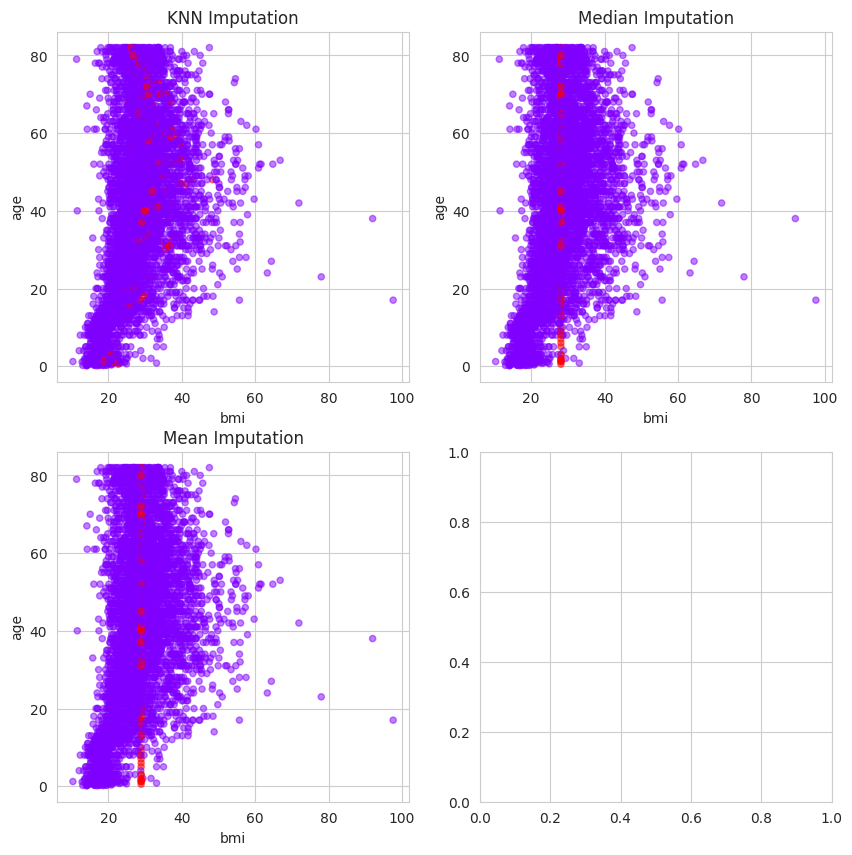

In [212]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
nullity = dfe['bmi'].isnull() + dfe['age'].isnull()
imputations = {
    'KNN Imputation': KNN_impute,
    'Median Imputation': Median_impute,
    'Mean Imputation': Mean_impute,
}

for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(
        x='bmi',
        y='age',
        kind='scatter',
        alpha=0.5,
        c=nullity,
        cmap='rainbow',
        ax=ax,
        colorbar=False, title=df_key
    )

Text(0.5, 1.0, 'Original Data')

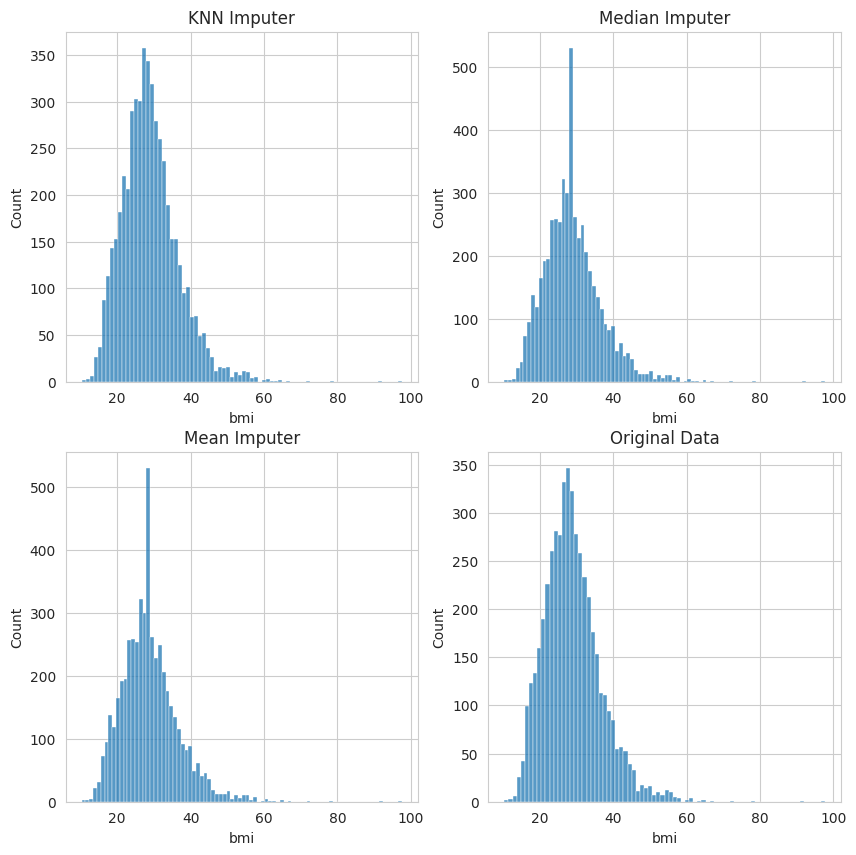

In [213]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sns.histplot(
    KNN_impute['bmi'],
    ax=axes[0,0],
).set_title('KNN Imputer')

sns.histplot(
    Median_impute['bmi'],
    ax=axes[0,1]
).set_title('Median Imputer')


sns.histplot(
    Mean_impute['bmi'],
    ax=axes[1,0]
).set_title('Mean Imputer')


sns.histplot(
    dfe['bmi'],
    ax=axes[1,1]
).set_title('Original Data')

In [214]:
# Imputasi nilai null value dengan menggunakan Simple Imputer Strategy Median
SIimputer = SimpleImputer(strategy='median')
dfe = pd.DataFrame(
    data=SIimputer.fit_transform(dfe),
    columns=dfe.columns
)

## Scalling

In [215]:
numeric = ['age', 'avg_glucose_level',	'bmi']
categorical = ['hypertension',	'heart_disease', 'gender_oe',	'ever_married_oe',	'work_type_oe',	'Residence_type_oe',	'smoking_status_oe']
scaler = RobustScaler()
dfe_numeric_rsc = pd.DataFrame(data=scaler.fit_transform(dfe[numeric]), columns=numeric)
dfe_rsc = pd.merge(dfe_numeric_rsc, dfe[categorical], left_index=True, right_index=True)

<Axes: >

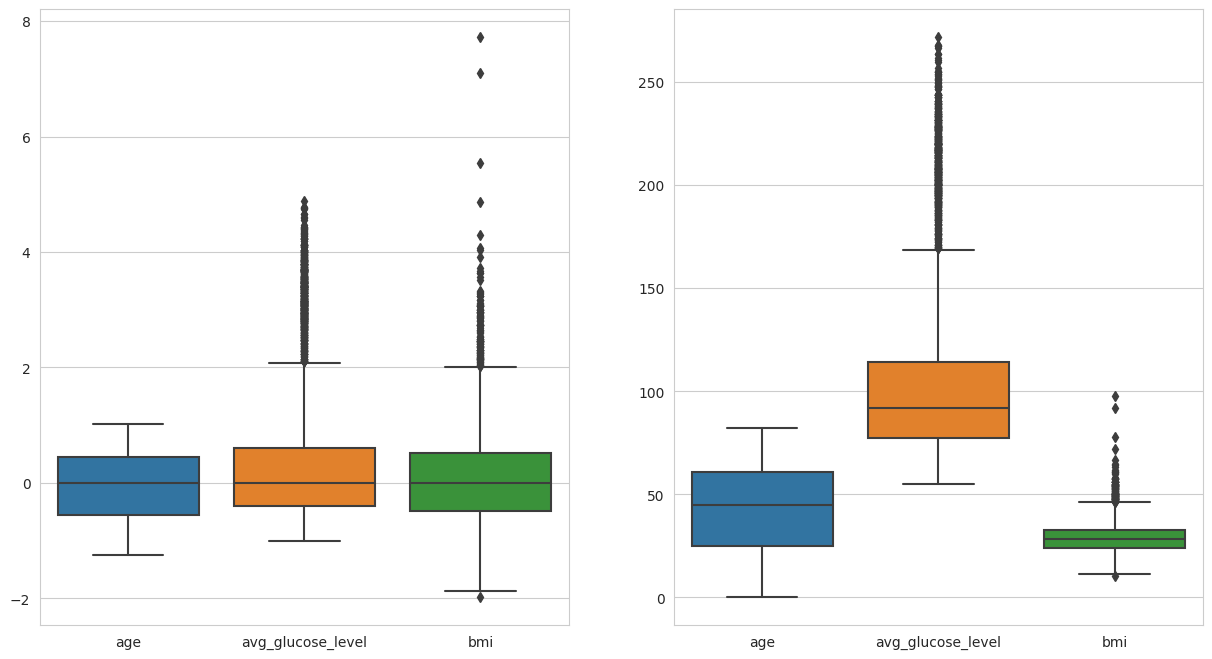

In [216]:
fig, ax = plt.subplots(figsize=(15,8), ncols=2, nrows=1)

sns.boxplot(
    dfe_rsc[['age',	'avg_glucose_level',	'bmi']],
    ax=ax[0]
)

sns.boxplot(
    dfe[['age',	'avg_glucose_level',	'bmi']],
    ax=ax[1]
)

# Model Preparation

In [217]:
# mengubah tipe data untuk ML
dfe_rsc['hypertension'] = dfe_rsc['hypertension'].astype(int)
dfe_rsc['heart_disease'] = dfe_rsc['heart_disease'].astype(int)
dfe_rsc['smoking_status_oe'] = dfe_rsc['smoking_status_oe'].astype(int)
dfe_rsc['work_type_oe'] = dfe_rsc['work_type_oe'].astype(int)
dfe_rsc['gender_oe'] = dfe_rsc['gender_oe'].astype(int)
dfe_rsc['ever_married_oe'] = dfe_rsc['ever_married_oe'].astype(int)
dfe_rsc['Residence_type_oe'] = dfe_rsc['Residence_type_oe'].astype(int)

In [240]:
dfe_rsc

,age,avg_glucose_level,bmi,hypertension,heart_disease,gender_oe,ever_married_oe,work_type_oe,Residence_type_oe,smoking_status_oe
0,0.611111,3.712619,0.944444,0,1,1,1,2,1,3
1,0.444444,2.994030,0.000000,0,0,0,1,4,0,1
2,0.972222,0.381004,0.488889,0,1,1,1,2,0,1
3,0.111111,2.153324,0.700000,0,0,0,1,2,1,2
4,0.944444,2.231750,-0.455556,1,0,0,1,4,0,1
...,...,...,...,...,...,...,...,...,...,...
5104,0.972222,-0.220624,0.000000,1,0,0,1,2,1,1
5105,1.000000,0.904206,1.322222,0,0,0,1,4,1,1
5106,-0.277778,-0.241248,0.277778,0,0,0,1,4,0,1
5107,0.166667,2.019267,-0.277778,0,0,1,1,2,0,3


## Correlation

<Axes: >

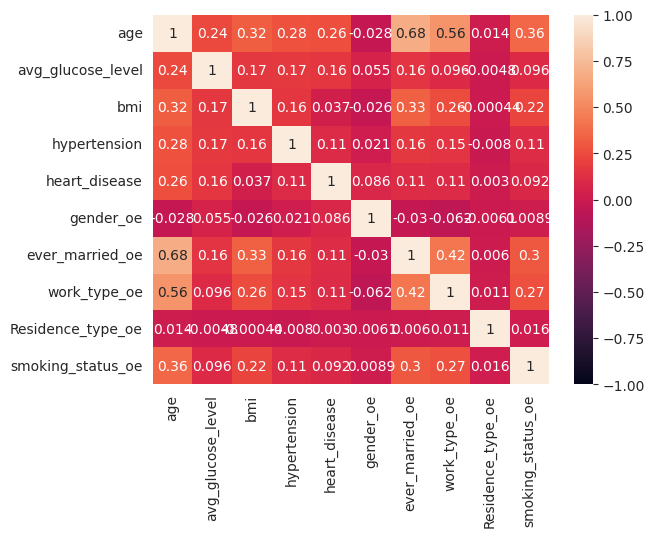

In [244]:
sns.heatmap(dfe_rsc.corr(), vmin=-1, vmax=1, annot=True)

## Train Test Split

In [218]:
X = dfe_rsc.loc[:, dfe_rsc.columns != 'heart_disease']
y = dfe_rsc['heart_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Part of Data Train

In [219]:
X_train

,age,avg_glucose_level,bmi,hypertension,gender_oe,ever_married_oe,work_type_oe,Residence_type_oe,smoking_status_oe
802,0.944444,0.563365,0.044444,0,1,1,4,0,3
3926,0.472222,-0.096608,0.911111,0,0,1,2,1,0
2337,-0.666667,-0.878155,0.622222,0,0,0,2,0,1
3909,-0.388889,-0.710448,0.255556,0,1,1,3,1,3
1886,-0.388889,-0.875170,-0.911111,0,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...
4426,0.444444,1.418182,0.188889,0,0,1,2,0,1
466,0.444444,2.121303,3.566667,1,0,1,2,0,2
3092,-1.217778,0.146540,-1.144444,0,0,0,1,1,0
3772,-0.194444,0.055631,-0.733333,0,0,1,3,0,1


In [220]:
y_train

802     0
3926    0
2337    0
3909    0
1886    0
       ..
4426    0
466     0
3092    0
3772    0
860     0
Name: heart_disease, Length: 4087, dtype: int64

In [221]:
y_train[y_train == 1].sum()

206

## Part of Data Test

In [222]:
X_test

,age,avg_glucose_level,bmi,hypertension,gender_oe,ever_married_oe,work_type_oe,Residence_type_oe,smoking_status_oe
4687,-0.388889,-0.733514,-0.566667,0,1,0,4,0,0
4477,-0.138889,-0.721574,0.022222,0,1,1,4,0,1
3520,0.194444,0.519946,0.211111,0,1,1,2,0,1
4354,0.944444,-0.413569,-0.955556,1,0,1,4,0,1
3825,0.833333,0.078426,-0.100000,0,0,1,3,0,1
...,...,...,...,...,...,...,...,...,...
3604,-1.197778,1.413569,0.000000,0,1,0,1,0,0
3509,-0.833333,2.686839,-0.677778,0,0,0,1,1,1
4753,0.194444,-0.650204,0.333333,0,1,1,2,0,1
4104,0.305556,0.997286,-0.355556,0,0,0,4,1,2


In [223]:
y_test

4687    0
4477    0
3520    0
4354    0
3825    0
       ..
3604    0
3509    0
4753    0
4104    0
2902    1
Name: heart_disease, Length: 1022, dtype: int64

In [224]:
y_test[y_test == 1].sum()

70

# Modelling

In [225]:
def data_training(X_train, X_test, y_train, y_test):

    models = []
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('GBM', GradientBoostingClassifier()))
    models.append(('XGBoost', XGBClassifier()))
    models.append(('LightGBM', LGBMClassifier()))

    res_cols = ["model", "accuracy_score", "scale_method", "0_precision", "0_recall", "1_precision", "1_recall"]
    df_result = pd.DataFrame(columns=res_cols)
    index = 0
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        class_report = classification_report(y_test, y_pred, digits=2, output_dict=True)
        zero_report = class_report['0']
        one_report = class_report['1']

        idx_res_values = [name, score, "NA", zero_report['precision'], zero_report['recall'], one_report['precision'], one_report['recall']]
        # df_result.at[index, res_cols] = idx_res_values
        df_result.loc[index, res_cols] = idx_res_values
        index += 1
    df_result = df_result.sort_values("accuracy_score", ascending=False).reset_index(drop=True)
    return df_result

In [226]:
training_result = data_training(X_train, X_test, y_train, y_test)
training_result

[LightGBM] [Info] Number of positive: 206, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000692 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 628
[LightGBM] [Info] Number of data points in the train set: 4087, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.050404 -> initscore=-2.935972
[LightGBM] [Info] Start training from score -2.935972


,model,accuracy_score,scale_method,0_precision,0_recall,1_precision,1_recall
0,KNN,0.932485,NA,0.936696,0.994748,0.545455,0.085714
1,RF,0.930528,NA,0.93144,0.99895,0.0,0.0
2,GBM,0.928571,NA,0.932153,0.995798,0.2,0.014286
3,XGBoost,0.923679,NA,0.936128,0.985294,0.3,0.085714
4,LightGBM,0.922701,NA,0.931751,0.989496,0.090909,0.014286
5,CART,0.890411,NA,0.946809,0.934874,0.243902,0.285714


# Tuning Model and Evaluation

In [227]:
def evaluation(model, x_train, x_test, y_train, y_test):
  """
  evaluate the model
  """
  clf = model

  y_predict_train = clf.predict(x_train)
  y_predict_test = clf.predict(x_test)

  training_acc = accuracy_score(y_train, y_predict_train)
  testing_acc = accuracy_score(y_test, y_predict_test)

  print("Training Accuracy: {:.2}".format(training_acc))
  print("Testing Accuracy: {:.2}".format(testing_acc))

  return print(classification_report(y_test, y_predict_test))


## KNN

In [228]:
train_score = {}
test_score = {}
n_neighbors = np.arange(2, 30, 1)
for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_score[neighbor]=knn.score(X_train, y_train)
    test_score[neighbor]=knn.score(X_test, y_test)

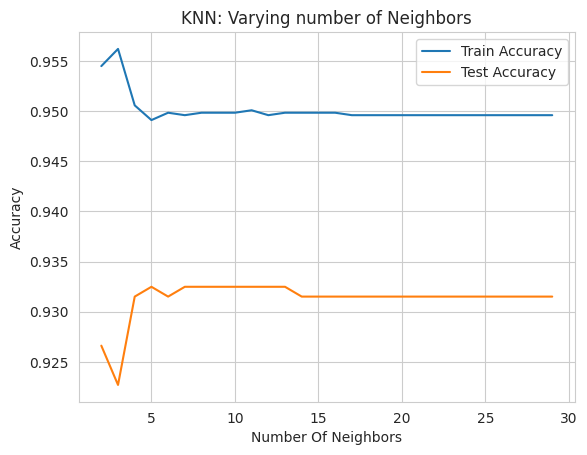

In [229]:
plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
plt.show()

In [230]:
KNNModel = KNeighborsClassifier(n_neighbors=5)
KNNModel.fit(X_train, y_train)

evaluation(KNNModel, X_train, X_test, y_train, y_test)

Training Accuracy: 0.95
Testing Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       952
           1       0.55      0.09      0.15        70

    accuracy                           0.93      1022
   macro avg       0.74      0.54      0.56      1022
weighted avg       0.91      0.93      0.91      1022



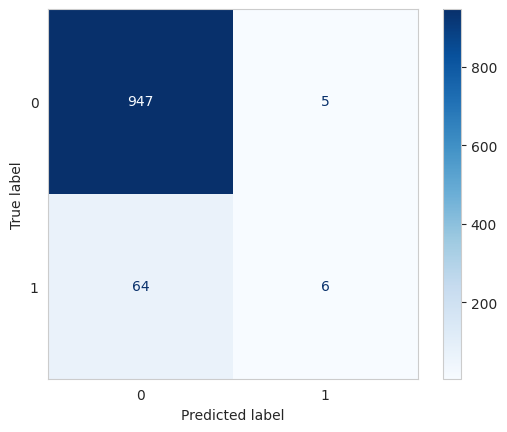

In [231]:
y_pred = KNNModel.predict(X_test)
cfm = confusion_matrix(y_test, y_pred=y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cfm,
    display_labels= KNNModel.classes_
)

disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

# Save Model to Pickle

In [232]:
# Save the model
joblib.dump(KNNModel, 'KNN_model.pkl')

['KNN_model.pkl']

# Test Pickle Model

In [233]:
# load classifier using joblib
my_model = joblib.load("KNN_model.pkl")
result_score = my_model.score(X_test, y_test)
print("Score: ", result_score)

Score:  0.9324853228962818
